In [38]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import xtrack as xt
import xpart as xp
import xobjects as xo

from cpymad.madx import Madx

import pybt

from prettytable import PrettyTable

In [39]:
mad = Madx(stdout=True)

# mad.call('../../../../models/acc-models-ps/scenarios/bare_machine/1_ion_injection_energy/ps_ion_bare_machine.beam')

# mad.input("BEAM, PARTICLE=Pb54, BRHO=80.05538284755649, MASS=0.931494*(207.947/208.), CHARGE=54./208.;")

mad.input("BEAM, PARTICLE=Pb54, BRHO=17.985911144927584, MASS=0.931494*(207.947/208.), CHARGE=54./208.;")

mad.call('../../../../models/acc-models-ps/ps_mu.seq')
mad.call('../../../../models/acc-models-ps/ps_ss.seq') 
mad.call('../../../../models/acc-models-ps/scenarios/east/4_slow_extraction/ps_se_east.str')
mad.call("../../../../models/acc-models-ps/_scripts/macros.madx")

mad.input('exec, write_str_file("ps_se_east.str");')

mad.use(sequence='PS')


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.08.01  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2022.02.25               +
  + Execution date: 2023.03.02 16:30:42      +
  ++++++++++++++++++++++++++++++++++++++++++++
/**********************************************************************************

*

* Elements description and sequence file for each PS main unit (MU).

*

* 07/10/2020 - Alexander Huschauer

************************************************************************************/



/************************************************************************************

*

*         DEFINITION OF FOCUSING AND DEFOCUSING HALF-UNITS OF THE MU               

*

*************************************************************************************/



/************************************************************************************

*        							 F HALF-UNITS     					            

***********************

In [40]:
initial_twiss = mad.twiss()
print(f"{'Horizontal tune:':<18}{initial_twiss.summary['q1']:>17.7f}")
print(f"{'Vertical tune:':<18}{initial_twiss.summary['q2']:>17.7f}")
print(f"{'Magnetic rigidity:':<18}{mad.eval('BEAM->BRHO'):>17.7f}")

enter Twiss module
  
iteration:   1 error:   1.819621E-03 deltap:   0.000000E+00
orbit:   2.101246E-03  1.661586E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   2 error:   2.558824E-05 deltap:   0.000000E+00
orbit:   2.091665E-03  1.667237E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   3 error:   1.003865E-09 deltap:   0.000000E+00
orbit:   2.091665E-03  1.667237E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
          628.3185                 -0      0.02581265149        6.224202176 

                q1                dq1            betxmax              dxmax 
       6.323299708       -2.001254545        32.28796336        5.345179089 

             dxrms             xcomax             xcorms                 q2 
       3.253009111      0.03408032387     0.007371706694        6.218892911 

               dq2            

In [41]:
mad.seqedit(sequence='ps')
mad.flatten()
mad.endedit()
mad.save(sequence='ps', file='ps_flat.seq')

++++++ info: seqedit - number of elements installed:  0
++++++ info: seqedit - number of elements moved:      0
++++++ info: seqedit - number of elements removed:    0
++++++ info: seqedit - number of elements replaced:   0
++++++ warning: SAVE makes all previous USE invalid !  


True

In [42]:
mad.use(sequence='ps')
mad.select(flag='makethin', class_='rbend', slice_=5)
mad.select(flag='makethin', class_='quadrupole', slice_=5)
mad.select(flag='makethin', class_='sbend', slice_=5)
mad.select(flag='makethin', class_='sextupole', slice_=5)
mad.makethin(sequence='ps')
mad.save(sequence='ps', file='ps_thin.seq')

makethin: slicing sequence : ps
++++++ warning: SAVE makes all previous USE invalid !  


True

In [43]:
before_match = mad.twiss()

enter Twiss module
++++++ warning: division by zero, result set to zero, expr: kprxse * 2.81682 * pr.xse01.a->l / pr.xse07->l 
++++++ warning: division by zero, result set to zero, expr: - kprqtrta * 0.47968 * pr.qtrta49->l / pr.qtrta41->l 
++++++ warning: division by zero, result set to zero, expr: - kprqtrta * 0.47968 * pr.qtrta49->l / pr.qtrta41->l 
++++++ warning: division by zero, result set to zero, expr: - kprqtrtb * 0.47968 * pr.qtrta49->l / pr.qtrta41->l 
++++++ warning: division by zero, result set to zero, expr: - kprqtrtb * 0.47968 * pr.qtrta49->l / pr.qtrta41->l 
++++++ warning: division by zero, result set to zero, expr: kprxse * 2.81682 * pr.xse01.a->l / pr.xse07->l 
++++++ warning: division by zero, result set to zero, expr: - kprqtrta * 0.47968 * pr.qtrta49->l / pr.qtrta41->l 
++++++ warning: division by zero, result set to zero, expr: - kprqtrta * 0.47968 * pr.qtrta49->l / pr.qtrta41->l 
++++++ warning: division by zero, result set to zero, expr: - kprqtrtb * 0.47968 

In [53]:
pfw_settings = {'k1prpfwf': -8.293069999999985e-05,
 'k1prpfwd': 7.121280000000002e-05,
 'k2prpfwf': -0.0022223931491652,
 'k2prpfwd': -0.0039871471525313}
for magnet, value in pfw_settings.items():
    mad.input(f"{magnet} := {value};")

++++++ info: k1prpfwf redefined
++++++ info: k1prpfwd redefined
++++++ info: k2prpfwf redefined
++++++ info: k2prpfwd redefined


In [54]:
mad.use(sequence='ps')
line = xt.Line.from_madx_sequence(
    mad.sequence['ps'],
    deferred_expressions=True
    )

++++++ warning: division by zero, result set to zero, expr: ( ( kprxse * 2.81682 * pr.xse01.a->l / pr.xse07->l ) * ( 0.66 ) ) / ( 5 ) 
++++++ warning: division by zero, result set to zero, expr: ( ( kprxse * 2.81682 * pr.xse01.a->l / pr.xse07->l ) * ( 0.66 ) ) / ( 5 ) 
++++++ warning: division by zero, result set to zero, expr: ( ( kprxse * 2.81682 * pr.xse01.a->l / pr.xse07->l ) * ( 0.66 ) ) / ( 5 ) 
++++++ warning: division by zero, result set to zero, expr: ( ( kprxse * 2.81682 * pr.xse01.a->l / pr.xse07->l ) * ( 0.66 ) ) / ( 5 ) 
++++++ warning: division by zero, result set to zero, expr: ( ( kprxse * 2.81682 * pr.xse01.a->l / pr.xse07->l ) * ( 0.66 ) ) / ( 5 ) 
++++++ warning: division by zero, result set to zero, expr: ( ( 0 - kprqtrta * 0.47968 * pr.qtrta49->l / pr.qtrta41->l ) * ( 0.23 ) ) / ( 5 ) 
++++++ warning: division by zero, result set to zero, expr: ( ( 0 - kprqtrta * 0.47968 * pr.qtrta49->l / pr.qtrta41->l ) * ( 0.23 ) ) / ( 5 ) 
++++++ warning: division by zero, resul

In [55]:
np.testing.assert_approx_equal(line.get_s_position("pr.bql72"), mad.sequence().element_positions()[mad.sequence().element_names().index("pr.bql72")])

In [56]:
N_PART = int( 1e4 )
N_TURN = 2000

In [57]:
line.particle_ref = xp.Particles(
    p0c = 291.174e9,
    q0=1,
    mass0=xp.PROTON_MASS_EV
)
ctx = xo.ContextCpu()
#ctx = xo.ContextPyopencl()

tracker = line.build_tracker(_context=ctx)

generating ./8e966e87e3ee4903a0011ff0e699e6e9.c
the current directory is '/Users/ash/cern/dev/md9044/analysis/simulation'


In [58]:
particles = xp.Particles(
    x = np.random.uniform(-1e-3, 1e-3, 10),
    px = np.random.uniform(-1e-5, 1e-5, 10),
    y = np.random.uniform(-2e-3, 2e-3, 10),
    py = np.random.uniform(-3e-5, 3e-5, 10),
    zeta = np.random.uniform(-1e-2, 1e-2, 10),
    delta = np.random.uniform(-1e-4, 1e-4, 10),
    _context=ctx
)
# tracker.track(
#     particles, 
#     num_turns = N_TURN, 
#     turn_by_turn_monitor = True
# )

In [59]:
# fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# ax.scatter(tracker.record_last_track.x, tracker.record_last_track.px, c=tracker.record_last_track.at_turn, cmap='viridis', s=1)
# ax.legend()

In [60]:
tw = tracker.twiss(method='4d')
mad_tw = mad.twiss()

++++++ warning: division by zero, result set to zero, expr: ( ( kprxse * 2.81682 * pr.xse01.a->l / pr.xse07->l ) * ( 0.66 ) ) / ( 5 ) 
++++++ warning: division by zero, result set to zero, expr: ( ( kprxse * 2.81682 * pr.xse01.a->l / pr.xse07->l ) * ( 0.66 ) ) / ( 5 ) 
++++++ warning: division by zero, result set to zero, expr: ( ( kprxse * 2.81682 * pr.xse01.a->l / pr.xse07->l ) * ( 0.66 ) ) / ( 5 ) 
++++++ warning: division by zero, result set to zero, expr: ( ( kprxse * 2.81682 * pr.xse01.a->l / pr.xse07->l ) * ( 0.66 ) ) / ( 5 ) 
++++++ warning: division by zero, result set to zero, expr: ( ( kprxse * 2.81682 * pr.xse01.a->l / pr.xse07->l ) * ( 0.66 ) ) / ( 5 ) 
++++++ warning: division by zero, result set to zero, expr: ( ( 0 - kprqtrta * 0.47968 * pr.qtrta49->l / pr.qtrta41->l ) * ( 0.23 ) ) / ( 5 ) 
++++++ warning: division by zero, result set to zero, expr: ( ( 0 - kprqtrta * 0.47968 * pr.qtrta49->l / pr.qtrta41->l ) * ( 0.23 ) ) / ( 5 ) 
++++++ warning: division by zero, resul

In [61]:
xtrack_summ = tw.get_summary()
madx_summ = mad_tw.summary
madx_rel_beta = mad.eval('BEAM->BETA')
table = PrettyTable()
table.field_names = ["Parameter", "Name", "Xtrack", "MAD-X * β0", "Δ"]
table.add_row(['Qx', "Horiz. Tune", round(xtrack_summ['qx'], 6), round(madx_summ['q1'], 6), round(xtrack_summ['qx'] - madx_summ['q1'], 6)])
table.add_row(['dQx', "Horiz. Chroma.", round(xtrack_summ['dqx'], 6), round(madx_summ['dq1']*madx_rel_beta, 6), round(xtrack_summ['dqx'] - madx_summ['dq1']*madx_rel_beta, 6)])
table.add_row(['Qy', "Vert. Tune", round(xtrack_summ['qy'], 6), round(madx_summ['q2'], 6), round(xtrack_summ['qy'] - madx_summ['q2'], 6)])
table.add_row(['dQy', "Vert. Chroma.", round(xtrack_summ['dqy'], 6), round(madx_summ['dq2']*madx_rel_beta, 6), round(xtrack_summ['dqy'] - madx_summ['dq2']*madx_rel_beta, 6)])
table.add_row(['Dx @ 0', "Horiz. pos. Dispers. [m]", round(tw['dx'][0], 6), round(mad_tw['dx'][0]*madx_rel_beta, 6), round(tw['dx'][0] - mad_tw['dx'][0]*madx_rel_beta, 6)])
table.add_row(['Dpx @ 0', "Horiz. mom. Dispers.", round(tw['dpx'][0], 6), round(mad_tw['dpx'][0]*madx_rel_beta, 6), round(tw['dpx'][0] - mad_tw['dpx'][0]*madx_rel_beta, 6)])
table.add_row(['Dy @ 0', "Vert. pos. Dispers. [m]", round(tw['dy'][0], 6), round(mad_tw['dy'][0]*madx_rel_beta, 6), round(tw['dy'][0] - mad_tw['dy'][0]*madx_rel_beta, 6)])
table.add_row(['Dpy @ 0', "Vert. mom. Dispers.", round(tw['dpy'][0], 6), round(mad_tw['dpy'][0]*madx_rel_beta, 6), round(tw['dpy'][0] - mad_tw['dpy'][0]*madx_rel_beta, 6)])

np.testing.assert_approx_equal(
    xtrack_summ['qx'], 
    madx_summ['q1'],
    5
)

np.testing.assert_approx_equal(
    xtrack_summ['qy'], 
    madx_summ['q2'],
    5
)

print(table)

+-----------+--------------------------+-----------+------------+--------+
| Parameter |           Name           |   Xtrack  | MAD-X * β0 |   Δ    |
+-----------+--------------------------+-----------+------------+--------+
|     Qx    |       Horiz. Tune        |  6.309529 |  6.309526  | 3e-06  |
|    dQx    |      Horiz. Chroma.      | -7.398101 | -7.398051  | -5e-05 |
|     Qy    |        Vert. Tune        |  6.218344 |  6.218344  |  -0.0  |
|    dQy    |      Vert. Chroma.       | -4.519056 | -4.519058  | 3e-06  |
|   Dx @ 0  | Horiz. pos. Dispers. [m] |  4.066716 |  4.066717  |  -0.0  |
|  Dpx @ 0  |   Horiz. mom. Dispers.   | -0.036393 | -0.036393  |  0.0   |
|   Dy @ 0  | Vert. pos. Dispers. [m]  |    0.0    |    -0.0    |  0.0   |
|  Dpy @ 0  |   Vert. mom. Dispers.    |    -0.0   |    -0.0    |  -0.0  |
+-----------+--------------------------+-----------+------------+--------+


- Dispersion is related to $\beta$, so check with ions
- Dispersion is the effect of the particle motion on the closed orbit with a change of relative momentum

$$
x_{closed} = x_{closed}(dpp=0)+D\cdot \frac{\Delta p}p$$

But in MAD-X, it uses $\Delta E/E$, so the definition of dispersion is different

So relate dE/E to dp/p

Dispersion MADX = factor * Dispersion World

## Derivation

$$
x_{closed} = x_{closed}|_{dpp=0}+D\cdot \frac{\Delta p}p$$
but instead of $\frac{\Delta p}p=\frac{P-P_0}{P_0}=\delta_p\ \textcircled{1}$, MAD-X uses $p_t=\frac{E-E_0}{P_0}=\frac{\Delta E}p\ \textcircled{2}$ as the longitudinal variable

where $P$ is the particle's momentum. These are linked by the relation
$$
E=\frac P\beta=\frac{P_0(1+\delta_p)}\beta\ \textcircled{3}$$ 

Using Natural units where $c=1$, general relation between $p_t$ and $\delta_p$ from $E^2=p^2c^2+m^2c^4$ is:

$$
E=\sqrt{P^2+m_0^2}=\sqrt{P^2_0(1+\delta_p)^2+m_0^2}\ \textcircled{4}$$ 

where $m_0$ is the particle's rest mass. Rearranging equation $\textcircled{2}$ and substituting equation $\textcircled{3}$ we can also write $E$ as:

$$
p_t=\frac{E-E_0}{P_0}\Rightarrow E=p_tP_0+E_0=P_0p_t+\frac{P_0}{\beta_0}\ \textcircled{5}$$


Equating $\textcircled{4}^2$ to $\textcircled{5}^2$, we can obtain:

$$
E^2=P_0^2+(1+\delta_p)^2+m_0^2$$

$$
E^2=\left(P_0p_t+\frac{P_0}{\beta_0}\right)^2$$

$$
\therefore P_0^2+(1+\delta_p)^2+m_0^2 = \left(P_0p_t+\frac{P_0}{\beta_0}\right)^2=P_0^2p_t^2+\frac{2P_0^2p_t}{\beta_0}+\frac{P_0^2}{\beta_0^2}\ \textcircled{6}$$

Once again using $\textcircled{4}$, we substitute into a rearranged left-hand-side of $\textcircled{3}$:

$$
\beta_0=\frac{P_0}{E_0}=\frac{P_0}{\sqrt{P^2_0+m^2_0}}$$

Rearranging this we find:
$$
\frac{P^2_0}{\beta^2_0}=P^2_0+m^2_0\ \textcircled{7}$$

Substituting this equation $\textcircled{7}$ into equation $\textcircled{6}$ gives:

$$
P^2_0(1+\delta_p)^2+m_0=P^2_0p_t^2+\frac{2P_0^2p_t}{\beta_0}+P_0^2+m_0^2$$

Cancelling $m_0$, dividing by $P_0^2$, and taking the square root gives:

$$
1+\delta_p=\sqrt{p_t^2+\frac{2p_t}{\beta_0}+1}$$

Approximating this, square and subtract one, resulting in:
$$
2\delta_p+\delta_p^2=p_t^2+\frac{2p_t}{\beta_0}$$

In general, $p_t\ll 1\therefore p_t\gg p_t^2$, so we can ignore the second order terms:

$$
p_t\approx\beta_0\delta_p\\\blacksquare$$

----

$$
PT=\frac{\Delta E}{p_sc}
=\frac{\Delta E}{p_0c(1+\Delta p)}
=\frac{\Delta E}{p_0c(1+\frac{\Delta p}{p_0})}
=\frac{\Delta E}{c(p_0+\Delta p)}
$$

In [14]:
EMIT = 5e-6

In [15]:
parts_x = pybt.tools.particles.beam_distrib_norm(alpha=tw['alfx'][0], beta=tw['betx'][0], eps = EMIT, nparts = N_PART, nsigma=5)
parts_y = pybt.tools.particles.beam_distrib_norm(alpha=tw['alfy'][0], beta=tw['bety'][0], eps = EMIT, nparts = N_PART, nsigma=5)
parts_s = pybt.tools.particles.dpp_distrib_norm(dpp=1e-3, nparts=N_PART, nsigma=2)

parts_x_disp = np.array(parts_x[:,0]) + np.array(tw['dx'][0] * parts_s)
parts_px_disp = np.array(parts_x[:,1]) + np.array(tw['dpx'][0] * parts_s)

parts_y_disp = np.array(parts_y[:,0]) + np.array(tw['dy'][0] * parts_s)
parts_py_disp = np.array(parts_y[:,1]) + np.array(tw['dpy'][0] * parts_s)

In [50]:
tw['dpy'][0]

-5.067241948016229e-14

In [44]:
EMIT

5e-06

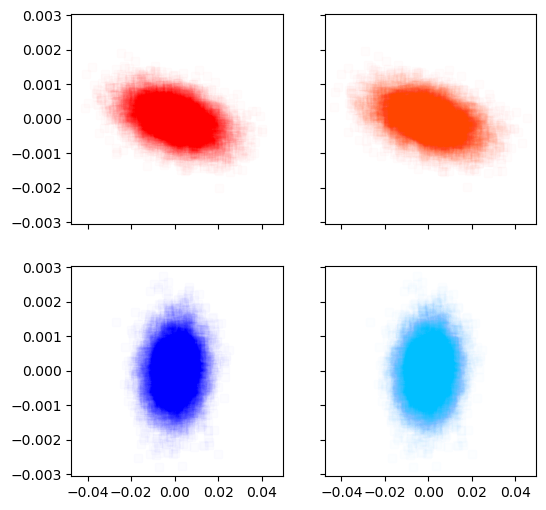

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True)
ax[0, 0].scatter(parts_x.T[0], parts_x.T[1], alpha=.01, marker=',', color='red')
ax[0, 1].scatter(parts_x_disp, parts_px_disp, marker=',', alpha=.01, color='orangered')
ax[1, 0].scatter(parts_y.T[0], parts_y.T[1], alpha=.01, marker=',', color='blue')
ax[1, 1].scatter(parts_y_disp, parts_py_disp, marker=',', alpha=.01, color='deepskyblue')

This is 5d

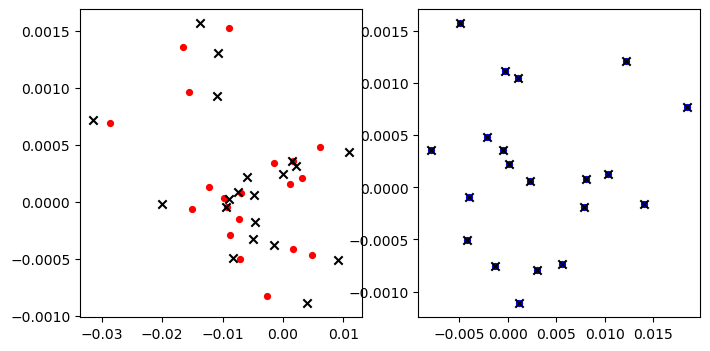

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(parts_x.T[0][0:20], parts_x.T[1][0:20], marker='.', color='red', s=70)
ax[0].scatter(parts_x_disp[0:20], parts_px_disp[0:20], marker='x', color='black')
ax[1].scatter(parts_y.T[0][0:20], parts_y.T[1][0:20], marker='.', color='blue', s=70)
ax[1].scatter(parts_y_disp[0:20], parts_py_disp[0:20], marker='x', color='black')

Normalised emittance

$$\epsilon^N=\epsilon\cdot\gamma\beta$$

where $\gamma$ $\beta$ are relativistic

so increasing energy will decrease $\epsilon$ but increase $\gamma\beta$, so $\epsilon^N$ stays the same

# Custom Monitor

In [18]:
line_with_monitor = line.copy()

In [19]:
smh57_monitor = xt.ParticlesMonitor(
    _context = ctx,
    num_particles = N_PART,
    start_at_turn = 0,
    stop_at_turn = N_TURN
)
smh61_monitor = xt.ParticlesMonitor(
    _context = ctx,
    num_particles = N_PART,
    start_at_turn = 0,
    stop_at_turn = N_TURN
)
line_with_monitor.insert_element(index='pe.smh57', element=smh57_monitor, name="SMH57_MONITOR")
line_with_monitor.insert_element(index='pe.smh61', element=smh61_monitor, name="SMH61_MONITOR")

In [20]:
parts = tracker.build_particles(
    x = parts_x_disp,
    px = parts_px_disp,
    y = parts_y_disp,
    py = parts_py_disp
)

In [21]:
# tracker_with_monitor = line_with_monitor.build_tracker()
# tracker_with_monitor.track(
#     parts, 
#     num_turns = N_TURN
# )

In [22]:
# np.testing.assert_approx_equal(
#     smh57_monitor.at_element[0][0],
#     line_with_monitor.element_names.index("pe.smh57")-1
# )
# np.testing.assert_approx_equal(
#     smh61_monitor.at_element[0][0],
#     line_with_monitor.element_names.index("pe.smh61")-1
# )
# np.testing.assert_(
#     type(tracker.record_last_track),
#     type(None)
# )

In [23]:
# table2 = PrettyTable()
# table2.field_names = ["Particles", "Turns"]
# table2.add_row([N_PART, N_TURN])
# print(table2)
# print("""
# monitor[particle_id][turn_id]
# """)

In [24]:
# fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# ax.scatter(smh57_monitor.x.T[-1], smh57_monitor.px.T[-1], marker='.', s=2)

In [25]:
# fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# ax.scatter(smh57_monitor.x.T[-1], smh57_monitor.px.T[-1], marker='.', s=2)

In [26]:
import json
with open("bare_line.json", 'w') as fid:
    json.dump(line.to_dict(), fid, cls=xo.JEncoder)

# Insert Exciter

In [27]:
from signal_gen import generate_chirp_signal
EXCITER_SAMPLING_FREQ = 1e6
FREV = 470151.0308
#FREV = 397*1e3

CHIRP_START = FREV*.3
CHIRP_STOP = FREV*.35
exciter_time, exciter_signal, turns = generate_chirp_signal(
    sampling_freq=EXCITER_SAMPLING_FREQ,
    chirp_start_freq=CHIRP_START,
    chirp_stop_freq=CHIRP_STOP
    )

In [28]:
turns

235075.5154

In [29]:
#N_TURN = int(np.ceil(turns))
N_TURN = 1000
exciter = xt.Exciter(
    _context = ctx,
    samples = exciter_signal,
    sampling = EXCITER_SAMPLING_FREQ,
    frev = FREV,
    start_turn = 0,
    knl = [.001]
)

In [30]:
smh57_monitor_exciter = xt.ParticlesMonitor(
    _context = ctx,
    num_particles = N_PART,
    start_at_turn = 0,
    stop_at_turn = N_TURN
)
smh61_monitor_exciter = xt.ParticlesMonitor(
    _context = ctx,
    num_particles = N_PART,
    start_at_turn = 0,
    stop_at_turn = N_TURN
)

In [31]:
line_with_exciter = line.copy(_context = ctx)
line_with_exciter.insert_element(
    element = exciter,
    name = "EXCITER",
    index='pr.kfb97'
)
line_with_exciter.insert_element(
    index='pe.smh57', 
    element=smh57_monitor_exciter, 
    name="SMH57_MONITOR")
line_with_exciter.insert_element(
    index='pe.smh61', 
    element=smh61_monitor_exciter, 
    name="SMH61_MONITOR")

In [32]:
parts_exciter = tracker.build_particles(
    x = parts_x_disp,
    px = parts_px_disp,
    y = parts_y_disp,
    py = parts_py_disp
)

In [33]:
tracker_with_exciter = line_with_exciter.build_tracker()
tracker_with_exciter.track(
    parts_exciter, 
    num_turns = N_TURN
)

generating ./9923f6ec43f4409eb01debbdc9d93cc8.c
the current directory is '/Users/ash/cern/dev/md9044/analysis/simulation'


In [34]:
print("1000 particles: 6 m 32 s")

1000 particles: 6 m 32 s


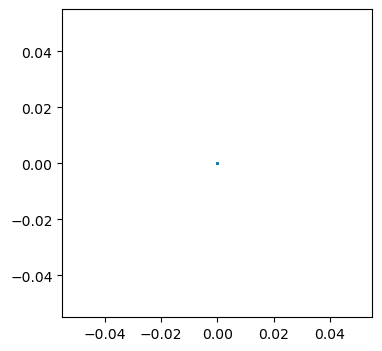

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(smh57_monitor_exciter.x.T[-1], smh57_monitor_exciter.px.T[-1], marker='.', s=2)

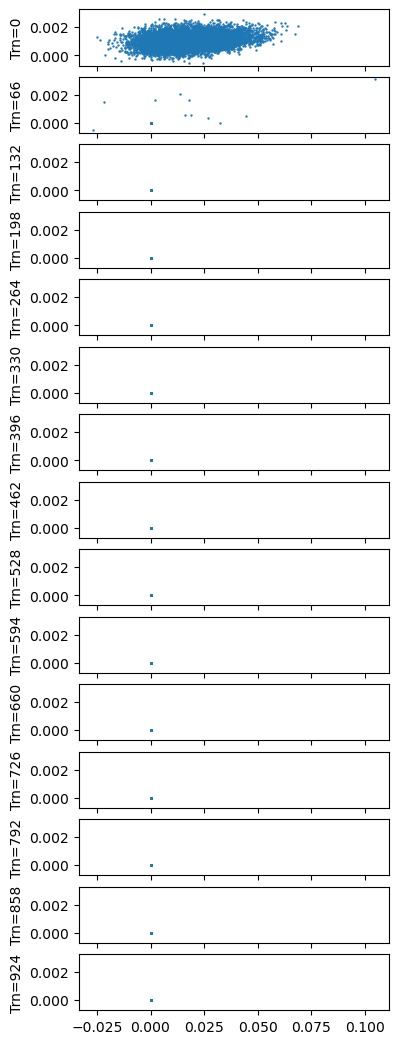

In [36]:
figs, axs = plt.subplots(15, 1, figsize=(4, 13), sharex=True, sharey=True)
FACTOR = int( np.floor(N_TURN / 15) )
for i in range(15):
    #axs[i, 0].scatter(smh57_monitor.x.T[i*FACTOR], smh57_monitor.px.T[i*FACTOR], marker='.', s=2)
    axs[i].scatter(smh57_monitor_exciter.x.T[i*FACTOR], smh57_monitor_exciter.px.T[i*FACTOR], marker='.', s=2)
    axs[i].set_ylabel(f"Trn={i*FACTOR}")
#axs[0, 0].set_title("no exciter")
#axs[0, 1].set_title("with exciter")

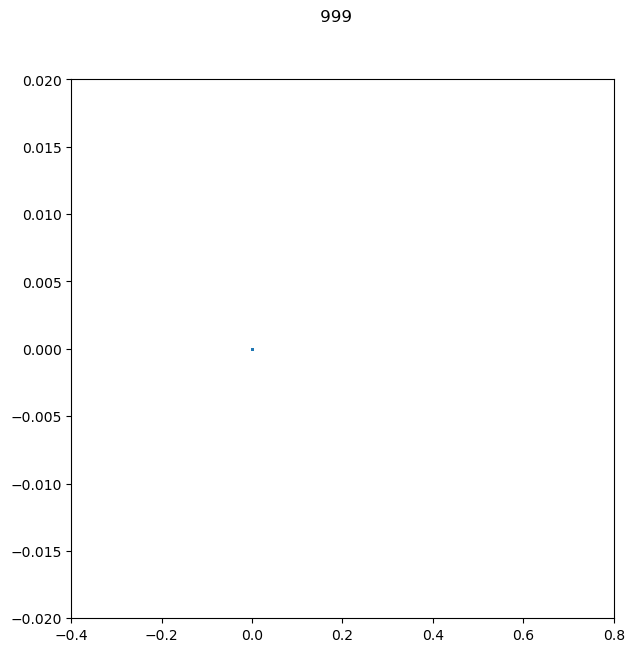

In [37]:
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots(figsize=(7, 7), tight_layout=False)

def animate(i):
    ax.clear()
    #ax.set_aspect("equal")
    ax.set_xlim(-0.4, 0.8)
    ax.set_ylim(-0.02, 0.02)
    fig.suptitle(f"{i:>4}")
    try:
        ax.scatter(smh57_monitor_exciter.x.T[i], smh57_monitor_exciter.px.T[i], marker='.', s=2)
    except:
        print("fail at", i)
        pass
    return
ani = FuncAnimation(fig, animate, interval=1, blit=False, repeat=False, frames=N_TURN)
ani.save("test.gif", writer=PillowWriter(fps=30))
